# Building a Customer Churn Model using TensorFlow and Kerras

### Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

### Loading Data Set

In [5]:
df = pd.read_csv('Churn.csv')

In [6]:
df.tail()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7043,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Fitting the Machine Learning Model

In [8]:
X = pd.get_dummies(df.drop(['Churn','Customer ID'],axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
y_train.head()

4246    0
3741    0
1553    0
3581    1
1499    1
Name: Churn, dtype: int64

## Building a Neural network model with Multiple Layers

In [12]:
model = Sequential()
model.add(Input(shape=(len(X_train.columns),)))  # Define the input shape here
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Fitting the model to have the best accuracy and minimum loss.

In [15]:
model.fit(X_train, y_train, epochs = 400, batch_size=32)

Epoch 1/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7356 - loss: 0.5250
Epoch 2/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7754 - loss: 0.4889
Epoch 3/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.4693
Epoch 4/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7798 - loss: 0.4780
Epoch 5/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 0.4786
Epoch 6/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7776 - loss: 0.4789
Epoch 7/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7769 - loss: 0.4781
Epoch 8/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7807 - loss: 0.4688
Epoch 9/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7843 - loss: 0.4619
Epoch 10/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7691 - loss: 0.4771
Epoch 11/400
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7750 - loss: 0.4706
Epoch 12/400
177/177 ━━━━━━━━━━━━━━━━━━━━

In [16]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Adding the Confusion Matrix for clearer predictions.

In [18]:
conf_matrix = confusion_matrix(y_test, y_hat)

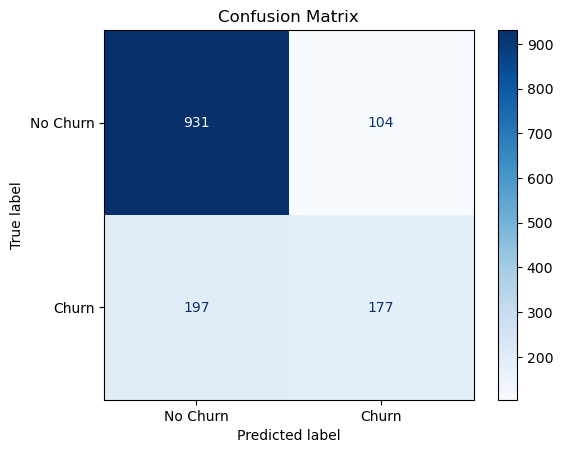

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## ROC Curve to visualize model's performance beyond accuracy.

In [21]:
y_prob = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

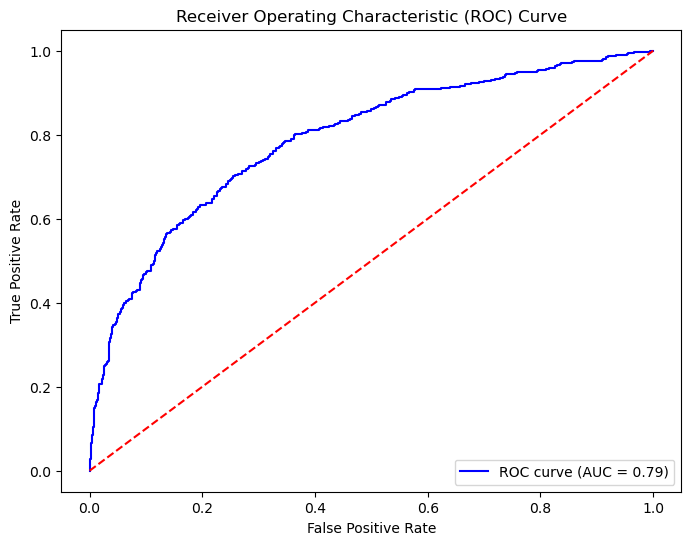

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy of the model.
##### The accuracy of the model is close to 80%, which can be better by adjusting different factors in the model.

In [25]:
accuracy_score(y_test, y_hat)

0.7863733144073811

In [26]:
# To save the model for future use.

In [27]:
model.save('C:\\Users\\rohit\\OneDrive\\Desktop\\Data Analyst\\ML\\model.keras')